<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [6]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [7]:
!pip install yfinance
!pip install bs4
!pip install nbformat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 109.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 104.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 86.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 84.4 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 34.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138890 sha256=2d87e878690fb5aa8ac9b9cccd942769f13471914e1de5ac162c2b0c52aab2cc
  Stored in directory: /home/jupyterlab/.cache/pip/

In [8]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [9]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [10]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [11]:
tselaa = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [12]:
Tsella = tselaa.history(period = "max")
Tsella.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [13]:
Tsella.reset_index(inplace=True)
Tsella.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [15]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 73.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 67.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 69.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 12.3 MB/s eta 0:00:00


<Axes: xlabel='Date'>

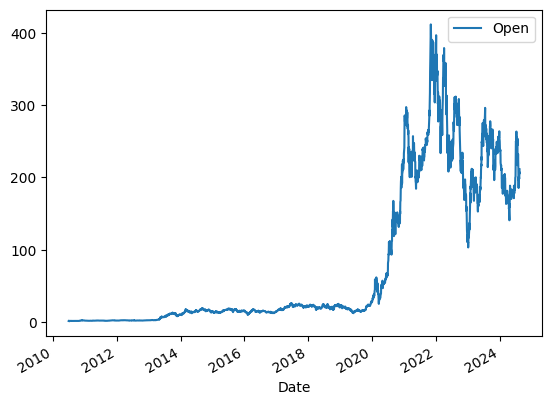

In [16]:
import matplotlib_inline
Tsella.plot(x="Date", y="Open")

## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [17]:
urlsd = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`. Make sure to use the `html_data` with the content parameter as follow `html_data.content` .


In [18]:
import pandas as pd

In [19]:
tesla_data1 = requests.get(urlsd).text
#print(datas)

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Find All Tables: Start by searching for all HTML tables on a webpage using `soup.find_all('table')`.
2. Identify the Relevant Table: then loops through each table. If a table contains the text “Tesla Quarterly Revenue,”, select that table.
3. Initialize a DataFrame: Create an empty Pandas DataFrame called `tesla_revenue` with columns “Date” and “Revenue.”
4. Loop Through Rows: For each row in the relevant table, extract the data from the first and second columns (date and revenue).
5. Clean Revenue Data: Remove dollar signs and commas from the revenue value.
6. Add Rows to DataFrame: Create a new row in the DataFrame with the extracted date and cleaned revenue values.
7. Repeat for All Rows: Continue this process for all rows in the table.

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
> Note: Instead of using the deprecated pd.append() method, consider using pd.concat([df, pd.DataFrame], ignore_index=True).
```

</details>


In [20]:
!mamba install bs4==4.10.0 -y
!pip install lxml==4.6.4
!mamba install html5lib==1.1 -y


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
conda-forge/linux-64 ━━╸━━━━━━━━━━━━━━━╸━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.1s
conda-forge/noarch   ━━━━━━━━━━━━━━━━━━━━━━━  13.7kB /  16.1MB @ 217.8kB/s  0.1s[+] 0.2s
conda-forge/linux-64 ╸━━━━━━━━━━━━━━━━━━━━━━   2.1MB /  37.0MB @  12.4MB/s  0.2s
conda-forge/noarch   ━━━━━━╸━━━━━━━━━━━━━━━━   5.2MB /  16.1MB @  30.8MB/s  0.2s[+] 0.3s
conda-forge/linux-64 ━━╸━━━━━━━━━━━━━━━━━━━━   5.8MB /  37.0MB @  20.7MB/s  0.3s
conda-forge/noarch   ━━━━━━━━━━━╸━━━━━━━━━━━   9.1MB /  16.1MB @  32.3MB/s  0.3s[+] 0.4s
conda-forge/linux-64 ━━━━╸━━━━━━━━━━━━━━━━━━   8.8MB /  37.0MB @  23.0MB/s  0.4s
conda-forge/noarch   ━━━━━━━━━━━━━━━━╸━━━━━━  12.1MB /  16.1MB @  31.4MB/s  0.4s[+] 0.5s
conda-forge/linux-64 ━━━━━━╸━━━━━━━━━━━━━━━━  12.1MB /  37.0MB @  24.6MB/s  0.5s
conda-forge/noarch   ━━━━━━━━━━━━━━━━━━━━╸━━  15.3MB /  16.1MB @  31.1MB/s  0.5s[+] 0.6s
conda-forge/linux-64 ━━━━━━╸━━━━━━━━━━━━━━━━  12.1MB /  37.0MB @  24.6MB/s  0.6s
conda-forge/noarch  

In [31]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web pag

In [32]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [33]:
soup = BeautifulSoup(tesla_data1, 'html.parser')

In [34]:
table_row = soup.find_all('tr')
table_row
table_head = soup.find_all('th')
#table_head
table_colmn = soup.find_all('td')
#table_colmn
table_body = soup.find_all('tbody')
#table_body

In [35]:
table_row = soup.find_all('tr')
table_row

[<tr>
 <th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>,
 <tr>
 <td style="text-align:center">2021</td>
 <td style="text-align:center">$53,823</td>
 </tr>,
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$31,536</td>
 </tr>,
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$24,578</td>
 </tr>,
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$21,461</td>
 </tr>,
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$11,759</td>
 </tr>,
 <tr>
 <td style="text-align:center">2016</td>
 <td style="text-align:center">$7,000</td>
 </tr>,
 <tr>
 <td style="text-align:center">2015</td>
 <td style="text-align:center">$4,046</td>
 </tr>,
 <tr>
 <td style="text-align:center">2014</td>
 <td style="text-align:center">$3,198</td>
 </tr>,
 <tr>
 <td style="text-align:center">2013</td>
 <td style="text-alig

In [36]:
table_head = soup.find_all('th')
table_head

[<th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>,
 <th colspan="2" style="text-align:center">Tesla Quarterly Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>,
 <th style="text-align:center">Sector</th>,
 <th style="text-align:center">Industry</th>,
 <th style="text-align:center">Market Cap</th>,
 <th style="text-align:center">Revenue</th>,
 <th style="text-align:center; width:40%;">Stock Name</th>,
 <th style="text-align:center; width:20%;">Country</th>,
 <th style="text-align:center; width:20%;">Market Cap</th>,
 <th style="text-align:center; width:20%;">PE Ratio</th>,
 <th>Link Preview</th>,
 <th>HTML Code (Click to Copy)</th>,
 <th>Link Preview</th>,
 <th>HTML Code (Click to Copy)</th>]

In [37]:
#print(soup.prettify())

In [38]:
tables = soup.find_all('table')

In [39]:
len(tables)

6

In [40]:
for index,table in enumerate(tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
print(table_index)

1


In [41]:
from datetime import datetime
#Tesla_revenue= pd.DataFrame(columns=["Date", "Revenue1", "Revenue2", "Revenue"])
tesla_revenue= pd.DataFrame(columns=["Date", "Revenue"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    Date =col[0].text
    #Date = datetime.strptime(col[0].text, "%Y-%m-%d")
    Revenue1 = col[1].text
    Revenue2 = Revenue1.replace('$', '')
    Revenue = Revenue2.replace(',', '')
    #Tesla_revenue = pd.concat([Tesla_revenue, pd.DataFrame({"Date": [Date], "Revenue1":[Revenue1], "Revenue2":[Revenue2], "Revenue": [Revenue]})], ignore_index=True)
    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [Date], "Revenue": [Revenue]})], ignore_index=True)
   # Tesla_revenue=Tesla_revenue.append({"Date":date,"Revenue":revenue},ignore_index=True)
    #Tesla_revenue['Revenue'] = Tesla_revenue['Revenue'].replace({'$','',',',''},regex=True)

In [51]:
print(tesla_revenue.head())

         Date Revenue
0  2022-09-30   21454
1  2022-06-30   16934
2  2022-03-31   18756
3  2021-12-31   17719
4  2021-09-30   13757


In [43]:
from datetime import datetime
#Tesla_revenue= pd.DataFrame(columns=["Date", "Revenue1", "Revenue2", "Revenue"])
tesla_stock= pd.DataFrame(columns=["Date", "Close"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    Date =col[0].text
    #Date = datetime.strptime(col[0].text, "%Y-%m-%d")
    Revenue1 = col[1].text
    Revenue2 = Revenue1.replace('$', '')
    Close = Revenue2.replace(',', '')
    #Tesla_revenue = pd.concat([Tesla_revenue, pd.DataFrame({"Date": [Date], "Revenue1":[Revenue1], "Revenue2":[Revenue2], "Revenue": [Revenue]})], ignore_index=True)
    tesla_stock = pd.concat([tesla_stock, pd.DataFrame({"Date": [Date], "Close": [Close]})], ignore_index=True)
   # Tesla_revenue=Tesla_revenue.append({"Date":date,"Revenue":revenue},ignore_index=True)
    #Tesla_revenue['Revenue'] = Tesla_revenue['Revenue'].replace({'$','',',',''},regex=True)

In [44]:
print(tesla_stock.head(5))

         Date  Close
0  2022-09-30  21454
1  2022-06-30  16934
2  2022-03-31  18756
3  2021-12-31  17719
4  2021-09-30  13757


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [45]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

In [46]:
tesla_stock["Close"] = tesla_stock['Close'].str.replace(',|\$',"", regex=True)

Execute the following lines to remove an null or empty strings in the Revenue column.


In [47]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [48]:
tesla_stock.dropna(inplace=True)

tesla_stock = tesla_stock[tesla_stock['Close'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [49]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [50]:
tesla_stock.tail()

,Date,Close
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [215]:
GameStop = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [216]:
gme_data = GameStop.history(period = 'max')
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [217]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [295]:
Stock_data1 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
gme_data = requests.get(Stock_data1).text
gme_data

'<!DOCTYPE html>\n<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->\n<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src=

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [306]:
Stock_data2 = BeautifulSoup(gme_data, "html.parser")

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [307]:
table_head = Stock_data2.find_all('th')
table_head

[<th colspan="2" style="text-align:center">GameStop Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>,
 <th colspan="2" style="text-align:center">GameStop Quarterly Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>,
 <th style="text-align:center">Sector</th>,
 <th style="text-align:center">Industry</th>,
 <th style="text-align:center">Market Cap</th>,
 <th style="text-align:center">Revenue</th>,
 <th style="text-align:center; width:40%;">Stock Name</th>,
 <th style="text-align:center; width:20%;">Country</th>,
 <th style="text-align:center; width:20%;">Market Cap</th>,
 <th style="text-align:center; width:20%;">PE Ratio</th>,
 <th>Link Preview</th>,
 <th>HTML Code (Click to Copy)</th>,
 <th>Link Preview</th>,
 <th>HTML Code (Click to Copy)</th>]

In [308]:
tabl = Stock_data2.find_all('table')

In [309]:
len(tabl)

6

In [310]:
for index,table in enumerate(tabl):
    if ("GameStop Quarterly Revenue" in str(table)):
        table_index = index
print(table_index)

1


In [336]:
#Tesla_revenue= pd.DataFrame(columns=["Date", "Revenue1", "Revenue2", "Revenue"])
gme_revenue= pd.DataFrame(columns=["Date", "Revenue"])
for row in tabl[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    GDate = col[0].text
    Revenueg1 = col[1].text
    Revenueg2 = Revenueg1.replace('$', '')
    Revenue = Revenueg2.replace(',', '')
    #Tesla_revenue = pd.concat([Tesla_revenue, pd.DataFrame({"Date": [Date], "Revenue1":[Revenue1], "Revenue2":[Revenue2], "Revenue": [Revenue]})], ignore_index=True)
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [Date], "Revenue": [Revenue]})], ignore_index=True)
   # Tesla_revenue=Tesla_revenue.append({"Date":date,"Revenue":revenue},ignore_index=True)
    #Tesla_revenue['Revenue'] = Tesla_revenue['Revenue'].replace({'$','',',',''},regex=True)

In [337]:
print(gme_revenue.head(63))

          Date Revenue
0   2009-06-30    1021
1   2009-06-30    2194
2   2009-06-30    1439
3   2009-06-30    1286
4   2009-06-30    1548
..         ...     ...
57  2009-06-30    1667
58  2009-06-30     534
59  2009-06-30     416
60  2009-06-30     475
61  2009-06-30     709

[62 rows x 2 columns]


In [339]:
#Tesla_revenue= pd.DataFrame(columns=["Date", "Revenue1", "Revenue2", "Revenue"])
gme_data = pd.DataFrame(columns=["Date", "Close"])
for row in tabl[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    GDate = col[0].text
    Revenueg1 = col[1].text
    Revenueg2 = Revenueg1.replace('$', '')
    Close = Revenueg2.replace(',', '')
    #Tesla_revenue = pd.concat([Tesla_revenue, pd.DataFrame({"Date": [Date], "Revenue1":[Revenue1], "Revenue2":[Revenue2], "Revenue": [Revenue]})], ignore_index=True)
    gme_data = pd.concat([gme_data, pd.DataFrame({"Date": [Date], "Close": [Close]})], ignore_index=True)
   # Tesla_revenue=Tesla_revenue.append({"Date":date,"Revenue":revenue},ignore_index=True)
    #Tesla_revenue['Revenue'] = Tesla_revenue['Revenue'].replace({'$','',',',''},regex=True)

In [340]:
print(gme_data.head(63))

          Date Close
0   2009-06-30  1021
1   2009-06-30  2194
2   2009-06-30  1439
3   2009-06-30  1286
4   2009-06-30  1548
..         ...   ...
57  2009-06-30  1667
58  2009-06-30   534
59  2009-06-30   416
60  2009-06-30   475
61  2009-06-30   709

[62 rows x 2 columns]


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [341]:
print(gme_revenue.tail())

          Date Revenue
57  2009-06-30    1667
58  2009-06-30     534
59  2009-06-30     416
60  2009-06-30     475
61  2009-06-30     709


In [342]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)

In [344]:
gme_data["Close"] = gme_data['Close'].str.replace(',|\$',"", regex=True)

In [346]:
gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

In [347]:
gme_data.dropna(inplace=True)

gme_data = gme_data[gme_data['Close'] != ""]

## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


In [146]:
''''def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()'''

'\'def make_graph(stock_data, revenue_data, stock):\n    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)\n    stock_data_specific = stock_data[stock_data.Date <= \'2021--06-14\']\n    revenue_data_specific = revenue_data[revenue_data.Date <= \'2021-04-30\']\n    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)\n    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)\n    fig.update_xaxes(title_text="Date", row=1, col=1)\n    fig.update_xaxes(title_text="Date", row=2, col=1)\n    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)\n    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)\n    fig.update_layout(showlegend=False,\n    height=900,\n    title=stock,\n    xaxis_range

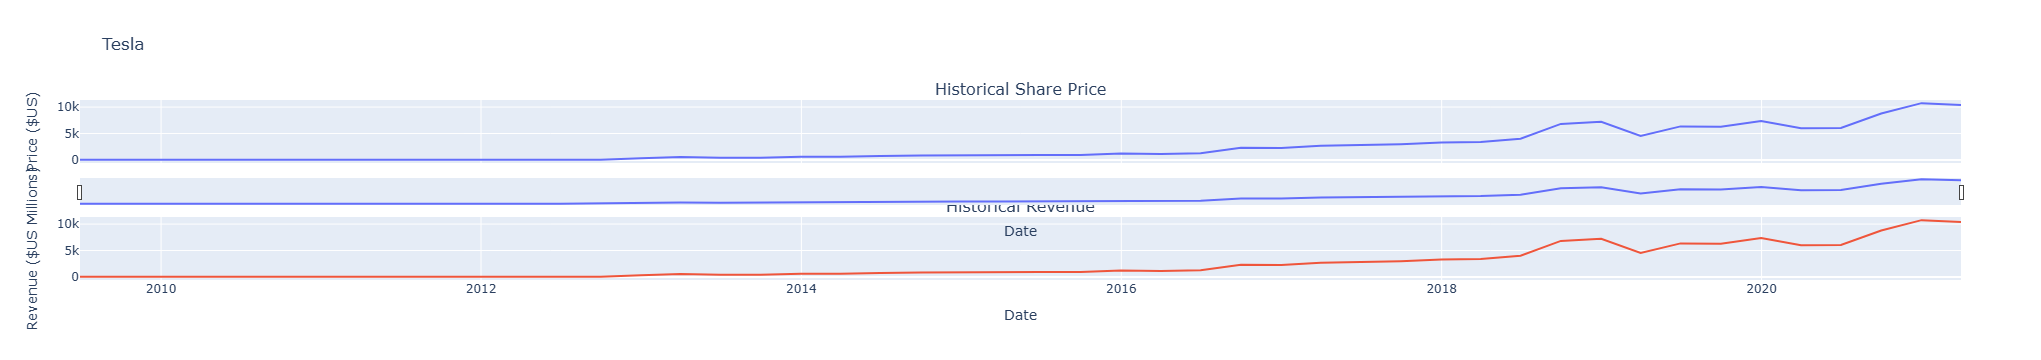

In [351]:
#tesla_revenue.plot(x = Date, y = int(Revenue))
#make_graph(tesla_data, tesla_revenue, 'Tesla')
make_graph(tesla_stock, tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


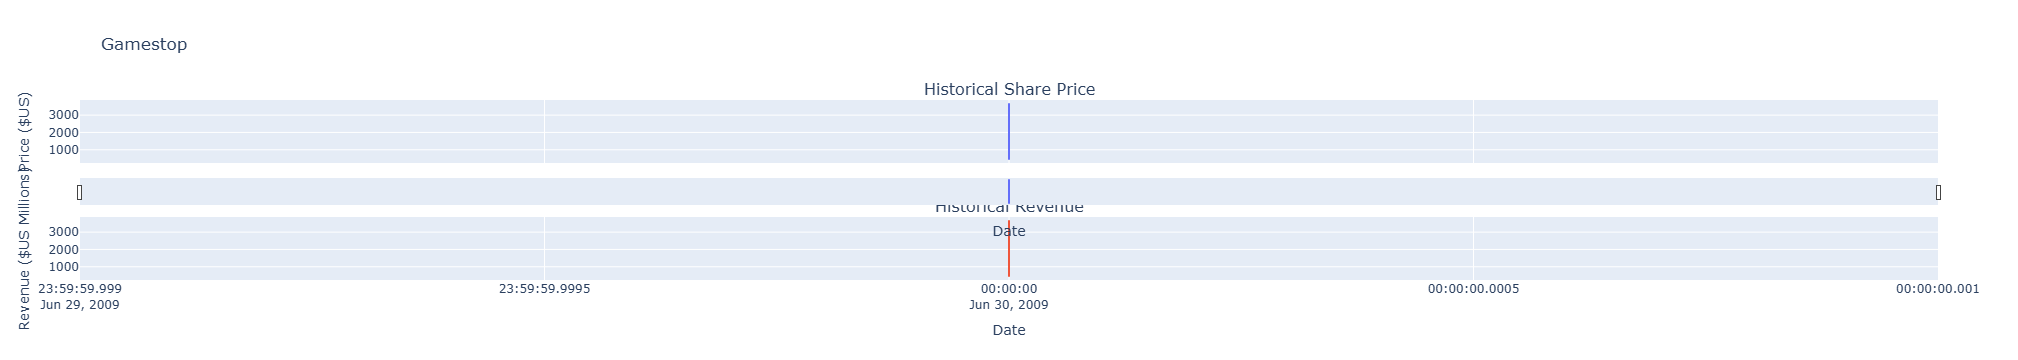

In [350]:
#print(gme_revenue.head(64))
#gme_revenue.plot(x="Date", Y ="Revenue")
make_graph(gme_data, gme_revenue, 'Gamestop')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

```toggle ## Change Log
```
```toggle | Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
```
```toggle | ----------------- | ------- | ------------- | ------------------------- |
```
```toggle | 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
```
```toggle | 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
```
```toggle | 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |
```
